In [13]:
# import dependencies
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns
from scipy.stats import linregress
from scipy.stats import shapiro
from scipy.stats import spearmanr
import os
import requests

In [14]:
# Import state data
state_data = pd.read_csv('Resources/state_data.csv')
state_df = pd.DataFrame(state_data)

In [15]:
#Import my census API Key
census_api_key = os.getenv('census_api_key')
if census_api_key:
    print('Key Found')
else:
    print('Key Not Found')

Key Found


In [16]:
# API URL
url = f"https://api.census.gov/data/2021/acs/acs5?get=B19013_001E,NAME&for=state:*&key={census_api_key}"
#Retrieve the census data
response = requests.get(url)

if response.status_code == 200:
    # Convert the data into a DataFrame
    data = response.json()
    columns = data[0]
    data_rows = data[1:]
    income_df = pd.DataFrame(data_rows, columns=columns)
    
    # Rename columns for clarity
    income_df.rename(columns={'B19013_001E': 'Median_Household_Income', 'NAME': 'State'}, inplace=True)

    # Convert the income column to numeric for proper merging
    income_df['Median_Household_Income'] = pd.to_numeric(income_df['Median_Household_Income'])
    
    # Remove extra columns like 'state' code if you don't need them
    income_df = income_df[['State', 'Median_Household_Income']]
    
    # Rename 'State' to 'state' to match the state_df column name
    income_df.rename(columns={'State': 'state'}, inplace=True)

income_df.head()

,state,Median_Household_Income
0,Alabama,54943
1,Alaska,80287
2,Arizona,65913
3,Arkansas,52123
4,California,84097


In [17]:
output_file = 'median_household_income.csv'

# Write the DataFrame to a CSV file
income_df.to_csv(output_file, index=False)

print(f"Data successfully written to {output_file}")

Data successfully written to median_household_income.csv


In [18]:
#Merge the state_df and income_df
state_df = state_df.merge(income_df, on='state', how='left')
state_df.columns

Index(['fips', 'state', 'county', 'adult_obesity_pct', 'adult_obesity_z',
       'food_environment_index', 'food_environment_index_z',
       'exercise_access_pct', 'exercise_access_z', 'excess_drinking_pct',
       'excess_drinking_z', 'uninsured_num', 'uninsured_pct', 'uninsured_z',
       'primary_care_phys_rate', 'primary_care_phys_z',
       'prevent_hospital_rate', 'prevent_hospital_z', 'income_inequal_80pct',
       'income_inequal_20pct', 'income_inequal_ratio', 'income_inequal_z',
       'early_death_count', 'early_death_years_lost', 'mental_health_ratio',
       'mental_health_rate', 'mental_health_num', 'housing_z',
       'unemployment_z', 'physical_inactive_z', 'smoking_z', 'dentists_z',
       'mental_health_z', 'poor_health_z', 'poor_phys_health_z',
       'poor_mental_health_z', 'dentists_ratio', 'dentists_num',
       'dentists_rate', 'exercise_access_pct.1', 'unemployment_num',
       'unemployment_pct', 'poor_physical_health_avg_days',
       'housing_inad_facil', 'h

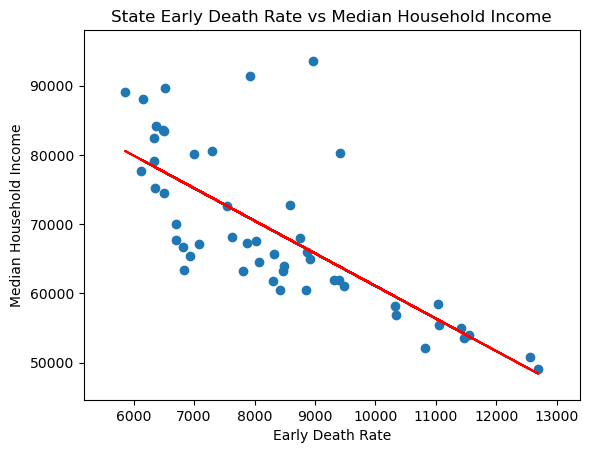

The r^2 value is: 0.5536843632844494


In [19]:
#Exploring State Level Early Death Years Lost vs Median Household Income
x_values = state_df['early_death_years_lost']
y_values = state_df['Median_Household_Income']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

padding_x = 0.1 * (max(x_values) - min(x_values))  # 10% padding for x-axis
padding_y = 0.1 * (max(y_values) - min(y_values))  # 10% padding for y-axis

plt.xlim(min(x_values) - padding_x, max(x_values) + padding_x)
plt.ylim(min(y_values) - padding_y, max(y_values) + padding_y)

plt.title('State Early Death Rate vs Median Household Income')
plt.xlabel('Early Death Rate')
plt.ylabel('Median Household Income')
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")  # Plot the regression line
plt.annotate(line_eq, (5.8, 0.8), fontsize=15, color="red")  # Annotate the line equation

# Call plt.show() as a function to display the plot
plt.show()
print(f'The r^2 value is: {rvalue**2}')

In [20]:
def spearmanr_function(column_1_name, column_2_name):
    # Check if the provided column names exist in the DataFrame
    if column_1_name not in state_df.columns or column_2_name not in state_df.columns:
        print(f"Error: One or both column names '{column_1_name}' or '{column_2_name}' do not exist in the DataFrame.")
        return

    # Get the columns to check from the DataFrame
    a = state_df[column_1_name]
    b = state_df[column_2_name]

    # Run the Spearman Rank Correlation test
    correlation, p_value = spearmanr(a, b)
    
    # Display the results
    print(f"Spearman Correlation Coefficient: {correlation}")
    print(f"P-value: {p_value}")

In [21]:
spearmanr_function('early_death_years_lost','Median_Household_Income')

Spearman Correlation Coefficient: -0.772760180995475
P-value: 3.067621191306268e-11


In [22]:
spearmanr_function('adult_obesity_pct','Median_Household_Income')

Spearman Correlation Coefficient: -0.7563482025415856
P-value: 1.3758140446755925e-10
